In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

---
# 1. 사진 준비
---

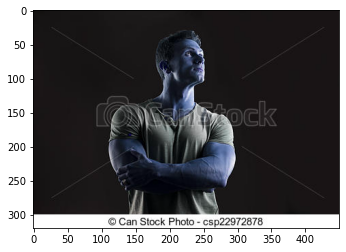

(320, 450, 3)


In [3]:
import os

# 고개를 옆으로 돌린 고양이상 소희 사진을 들고 왔다.
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/man2.jpg'
img_bgr = cv2.imread(my_image_path) # open cv로 읽고
# img_bgr = cv2.resize(img_bgr, (1350*2, 1080*3)) # resize하면 찌그러져서 안했다.
img_show = img_bgr.copy() # 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()
print(img_bgr.shape)

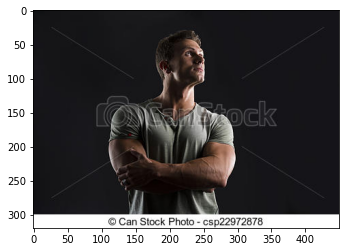

In [4]:
# bgr 에서 rgb로 바꿔서 푸르딩딩한 사진을 바꾸자
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

---
# 2. Face detection
dlib의 face detector는 HOG(Histogram of oriented Gradient) feature를 이용해서 svm의 sliding window로 얼굴을 찾는다.

---

In [5]:
import dlib
detector_hog = dlib.get_frontal_face_detector() # detector선언
print('--')

--


In [6]:
# bounding box
import cv2
dlib_rects=detector_hog(img_rgb,1)
print('--')

--


## 이미지 피라미드 
* detector_hog의 두번째 파라미터가 이미지 피라미드
* 동일 이미지의 서로 다른 사이즈의 세트
* 업샘플링으로 크기를 키우는 것
* 이미지 피라미드에서 얼굴 검출시 작게 촬영된 얼굴을 크게 볼 수 있어 더 정확한 검출이 가능

In [7]:
print(dlib_rects) #얼굴영역 좌표

rectangles[]


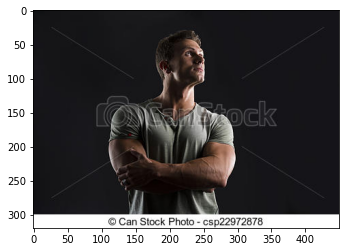

In [8]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()    
    r = dlib_rect.right()    
    b = dlib_rect.bottom()    
    cv2.rectangle(img_show,(l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)    
plt.imshow(img_show_rgb)
plt.show()
# 얼굴이 안잡힌다.

---
# 3. Face landmark
---

In [9]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print('--')

--


In [10]:
list_landmarks=[]
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb,dlib_rect) # dlib.full_object_detection 반환
    list_points=list(map(lambda p:(p.x,p.y),points.parts()))
    list_landmarks.append(list_points)
print(len(list_landmarks[0])) #68개의 랜드마크가 얼굴 개수만큼 저장됨
print(list_landmarks[0][0])
print(list_landmarks)


IndexError: list index out of range

# 문제점 찾아보기
- 다양한 각도에서 셀카 촬영, 반복 적용
- 문제점이 뭔지 최대한 자세히 기록
    -얼굴 각도에 따라 스티커가 어떻게 변해야할까요?  
    
    -멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
    
    -실행 속도가 중요할까요?
    
    -스티커앱을 만들 때 정확도가 얼마나 중요할까요?


# 고개를 옆으로 돌린 경우, 어두운 배경일 때

역시나 고개를 옆으로 돌리고, 어두워서 그런지 눈코입을 특정하지 못하였다. 

# 그 외 생각할 것
실행 속도도 중요하지만 정확하게 눈코입 얼굴을 파악하여 스티커를 알 곳을 아는 것이 중요하다고 생각한다. 몇가지 다른 사진으로도 테스트하였지만 어린 아이이거나 (face_detector가 성인 얼굴에 편중하여 학습한 듯함) 얼굴이 전부 다 나오지 않는 경우 등 방해요소가 있을 때 얼굴인식이 안된 것으로 보아 이런 경우도 고려하여 더 향상된 face_detector 모델을 구축할 수 있을 듯하다.  